In [6]:
import numpy as np
from math import atan2
from numpy import cos, sin, conjugate, sqrt

import cv2
import pylab as pl
from pylab import gray, imshow, show
from matplotlib import cm

print( "import completed.")

import completed.


In [3]:
# function define

def _slow_zernike_poly(Y,X,n,l):
    def _polar(r,theta):
        x = r * cos(theta)
        y = r * sin(theta)
        
        return 1.*x+1.j*y
    pass

    def _factorial(n):
        if n == 0: 
            return 1.
        else : 
            return n * _factorial(n - 1)
        pass
    pass

    y,x = Y[0],X[0]
    vxy = np.zeros(Y.size, dtype=complex)
    index = 0
    for x,y in zip(X,Y):
        Vnl = 0.
        
        for m in range( int( (n-l)//2 ) + 1 ):
            Vnl += (-1.)**m * _factorial(n-m) /  \
                ( _factorial(m) * _factorial((n - 2*m + l) // 2) * _factorial((n - 2*m - l) // 2) ) * \
                ( sqrt(x*x + y*y)**(n - 2*m) * _polar(1.0, l*atan2(y,x)) )
        pass
    
        vxy[index] = Vnl
        index = index + 1
    pass

    return vxy
pass

def zernike_reconstruct(img, radius, D, cof):

    idx = np.ones(img.shape)

    cofy,cofx = cof
    cofy = float(cofy)
    cofx = float(cofx)
    radius = float(radius)    

    Y,X = np.where(idx > 0)
    P = img[Y,X].ravel()
    Yn = ( (Y -cofy)/radius).ravel()
    Xn = ( (X -cofx)/radius).ravel()

    k = (np.sqrt(Xn**2 + Yn**2) <= 1.)
    frac_center = np.array(P[k], np.double)
    Yn = Yn[k]
    Xn = Xn[k]
    frac_center = frac_center.ravel()

    # in the discrete case, the normalization factor is not pi but the number of pixels within the unit disk
    npix = float(frac_center.size)

    reconstr = np.zeros(img.size, dtype=complex)
    accum = np.zeros(Yn.size, dtype=complex)

    for n in range(D+1):
        for l in range(n+1):
            if (n-l)%2 == 0:
                # get the zernike polynomial
                vxy = _slow_zernike_poly(Yn, Xn, float(n), float(l))
                # project the image onto the polynomial and calculate the moment
                a = sum(frac_center * conjugate(vxy)) * (n + 1)/npix
                # reconstruct
                accum += a * vxy
            pass
        pass
    pass

    reconstr[k] = accum
    return reconstr
pass

print( "functions are defined.")

functions are defined.


Original Input Image ...


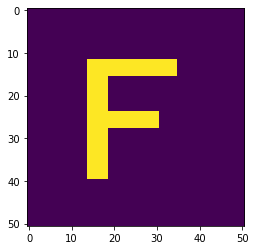

In [25]:
# image reconsturcion demo

print( "Original Input Image ..." )

path = 'gl5un.png'
#path = 'dog_image.jpg'

img = cv2.imread(path, 0)

rows, cols = img.shape
radius = max( rows, cols )//2 

imshow( img )
show()

Original Input Image ...


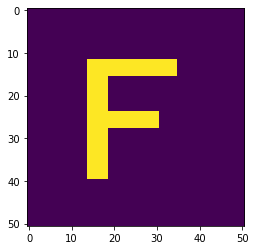

The image reconstruction order = 5
Done. = 5


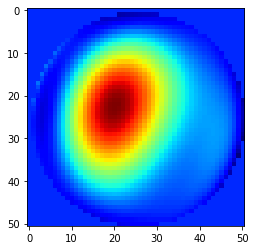

The image reconstruction order = 10
Done. = 10


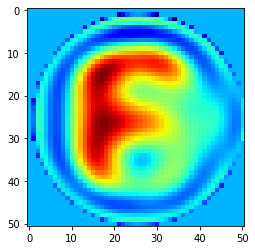

The image reconstruction order = 15
Done. = 15


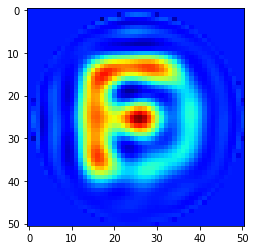

The image reconstruction order = 20
Done. = 20


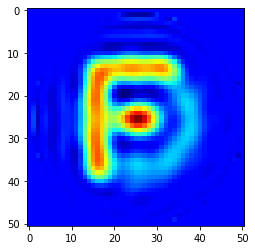

The image reconstruction order = 25
Done. = 25


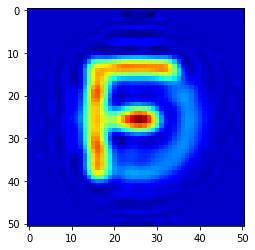

Good bye!


In [26]:
print( "Original Input Image ..." )
imshow( img )
show()

for idx, d in enumerate( range( 5, 30, 5 ) ) : 
    print( f"The image reconstruction order = { d }")

    reconst = zernike_reconstruct(img, radius, d, (rows/2., cols/2.))

    reconst = reconst.reshape(img.shape)
    print( f"Done. = { d }")

    fig_cnt = idx
    pl.figure( fig_cnt ) 
    imshow(reconst.real, cmap=cm.jet, origin = 'upper')
    show()
pass

print( "Good bye!" )